First 5 rows of the dataset:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]

Checking for missing values:
school        0
sex          

<ipython-input-1-2355bc2c1331>:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


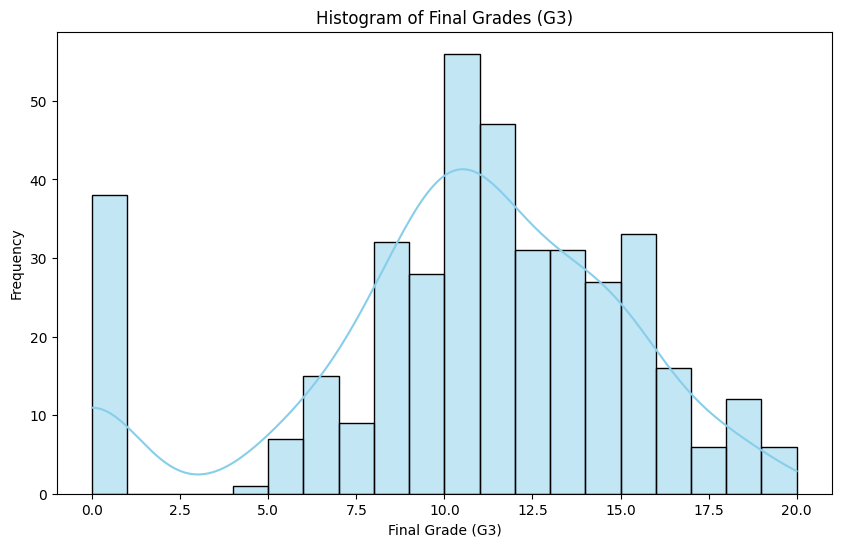

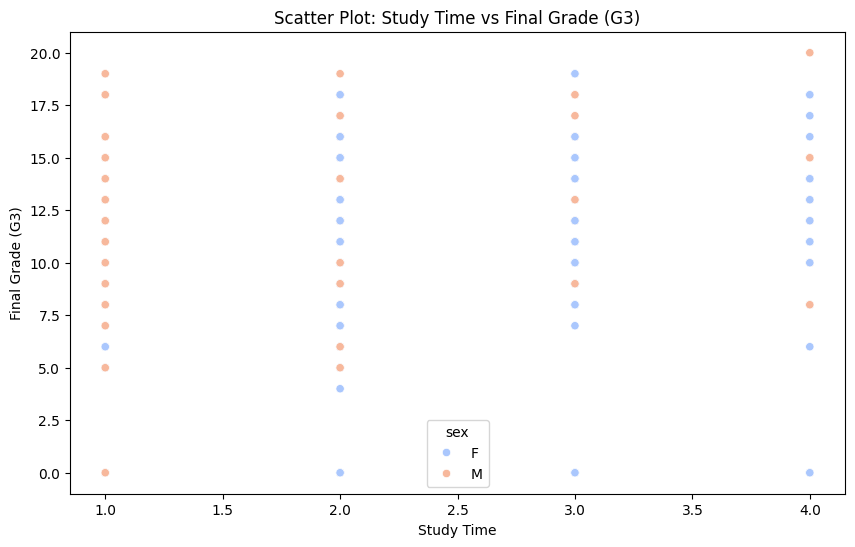

<ipython-input-1-2355bc2c1331>:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_g3_by_gender.index, y=average_g3_by_gender.values, palette='muted')


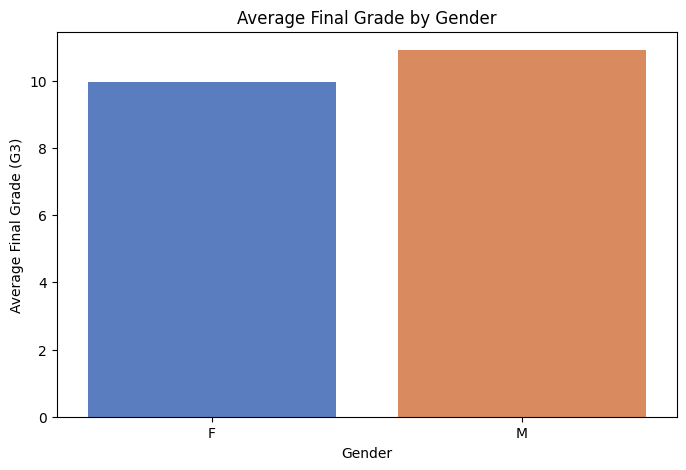

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "student-mat.csv"  # Ensure the correct file path
df = pd.read_csv(file_path, delimiter=';')

# Display the first few rows
print("First 5 rows of the dataset:")
print(df.head())

# Data Exploration
print("\nChecking for missing values:")
print(df.isnull().sum())

print("\nData types of each column:")
print(df.dtypes)

print("\nDataset shape (rows, columns):", df.shape)

# Data Cleaning
df = df.drop_duplicates()  # Remove duplicate entries

# Handle missing values by replacing with median (only for numerical columns)
for col in df.select_dtypes(include=[np.number]).columns:
    df[col].fillna(df[col].median(), inplace=True)

# Data Analysis
# 1. Average final grade (G3)
average_g3 = df["G3"].mean()
print("\nAverage final grade (G3):", round(average_g3, 2))

# 2. Number of students scoring above 15 in G3
students_above_15 = (df["G3"] > 15).sum()
print("Number of students scoring above 15 in G3:", students_above_15)

# 3. Correlation between study time and final grade (G3)
correlation_studytime_g3 = df["studytime"].corr(df["G3"])
print("Correlation between study time and G3:", round(correlation_studytime_g3, 4))

# 4. Gender-wise average final grade
average_g3_by_gender = df.groupby("sex")["G3"].mean()
print("\nAverage final grade by gender:")
print(average_g3_by_gender.round(2))

# Data Visualization
# 1. Plot a histogram of final grades
plt.figure(figsize=(10, 6))
sns.histplot(df['G3'], kde=True, color='skyblue', bins=20)
plt.title('Histogram of Final Grades (G3)')
plt.xlabel('Final Grade (G3)')
plt.ylabel('Frequency')
plt.show()

# 2. Create a scatter plot between study time and final grade
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='studytime', y='G3', hue='sex', palette='coolwarm')
plt.title('Scatter Plot: Study Time vs Final Grade (G3)')
plt.xlabel('Study Time')
plt.ylabel('Final Grade (G3)')
plt.show()

# 3. Create a bar chart comparing the average scores of male and female students
plt.figure(figsize=(8, 5))
sns.barplot(x=average_g3_by_gender.index, y=average_g3_by_gender.values, palette='muted')
plt.title('Average Final Grade by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Final Grade (G3)')
plt.show()
